<a href="https://colab.research.google.com/github/joydeep1007/Treee-classification/blob/master/Tree_species_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [6]:
import os
zip_path = '/content/drive/MyDrive/archive.zip' # Corrected file path
extract_path = '/content/'

if os.path.exists(zip_path):
    !unzip -q "{zip_path}" -d "{extract_path}"
    print("Dataset unzipped successfully.")
else:
    print(f"The file {zip_path} does not exist. Please check the path.")

# If you already extracted the dataset
dataset_path = "/content/Tree_Species_Dataset"  # Adjust path as per your structure

# Check class folders
print(os.listdir(dataset_path))

Dataset unzipped successfully.
['champa', 'bili', 'pipal', 'kesudo', 'shirish', 'bamboo', 'other', 'motichanoti', 'khajur', 'gunda', 'cactus', 'mango', 'gulmohor', 'jamun', 'banyan', 'saptaparni', 'neem', 'sonmahor', 'babul', 'pilikaren', 'asopalav', 'vad', 'nilgiri', 'kanchan', 'sitafal', 'sugarcane', 'simlo', 'garmalo', 'amla', 'coconut', '.git']


In [7]:
# Create train and validation sets using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1280 images belonging to 31 classes.
Found 320 images belonging to 31 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Adjust for number of classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.0574 - loss: 4.0005 - val_accuracy: 0.1094 - val_loss: 3.2617
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.1171 - loss: 3.2912 - val_accuracy: 0.1500 - val_loss: 3.1186
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.1134 - loss: 3.1751 - val_accuracy: 0.1594 - val_loss: 3.0819
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.1340 - loss: 3.0826 - val_accuracy: 0.1469 - val_loss: 3.0027
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.1447 - loss: 3.0248 - val_accuracy: 0.1719 - val_loss: 2.8902
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.1741 - loss: 2.9419 - val_accuracy: 0.2156 - val_loss: 2.8090
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.1934 - loss: 2.8586 - val_accuracy: 0.2562 - val_loss: 2.7281
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.2197 - loss: 2.7932 - val_accuracy: 0.2094 - val_loss:

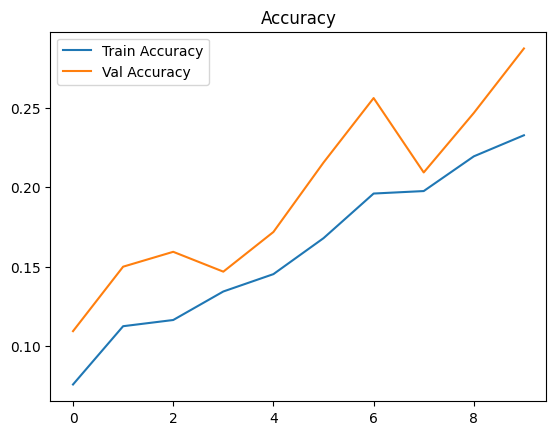

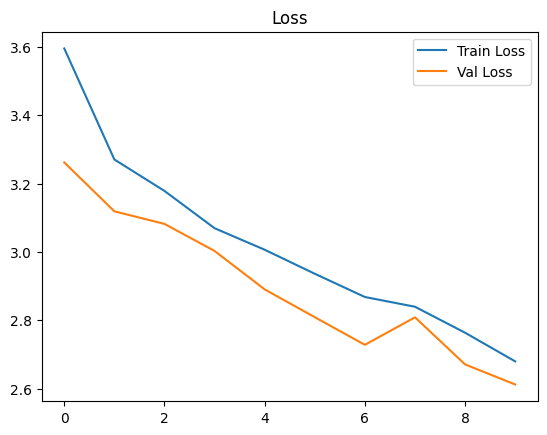

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()


In [13]:
# Evaluate on validation set
model.evaluate(val_generator)

# Predict on single image
from tensorflow.keras.preprocessing import image
import os

# --- Start of fix ---
# I'll list the files in the 'mango' directory to get a valid image file.
mango_dir = '/content/Tree_Species_Dataset/mango'
image_files = os.listdir(mango_dir)
if image_files:
    sample_image_path = os.path.join(mango_dir, image_files[0])
    print(f"Using image: {sample_image_path}")

    img = image.load_img(sample_image_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    predicted_class_index = np.argmax(pred)

    # Get the class name from the generator's class indices
    class_labels = list(train_generator.class_indices.keys())
    predicted_class_name = class_labels[predicted_class_index]

    print(f"Predicted class index: {predicted_class_index}")
    print(f"Predicted class name: {predicted_class_name}")
else:
    print("No images found in the 'mango' directory.")
# --- End of fix ---

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 393ms/step - accuracy: 0.2710 - loss: 2.6574
Using image: /content/Tree_Species_Dataset/mango/image49.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predicted class index: 17
Predicted class name: mango


In [20]:
# Save the model to HDF5 file
model.save("tree_species_model.h5")


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Build a deeper CNN model with Batch Normalization and Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile with Adam optimizer
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[early_stop, reduce_lr]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.0731 - loss: 6.4699 - val_accuracy: 0.0312 - val_loss: 9.9142 - learning_rate: 5.0000e-04
Epoch 2/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.1049 - loss: 3.2867 - val_accuracy: 0.0312 - val_loss: 16.5271 - learning_rate: 5.0000e-04
Epoch 3/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.1199 - loss: 3.2799 - val_accuracy: 0.0312 - val_loss: 20.3750 - learning_rate: 5.0000e-04
Epoch 4/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.1291 - loss: 3.1623 - val_accuracy: 0.0312 - val_loss: 13.5747 - learning_rate: 5.0000e-04
Epoch 5/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.1361 - loss: 3.0847 - val_accuracy: 0.1375 - val_loss: 8.5535 - learning_rate: 1.5000e-04
Epoch 6/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.1563 - loss: 2.9517 - val_accuracy: 0.1437 - val_loss: 9.3673 - learning_rate: 1.5000e-04
Epoch 7/25
40/40 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.1703 - l

In [16]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 482ms/step - accuracy: 0.2645 - loss: 2.6670
Validation Accuracy: 0.27


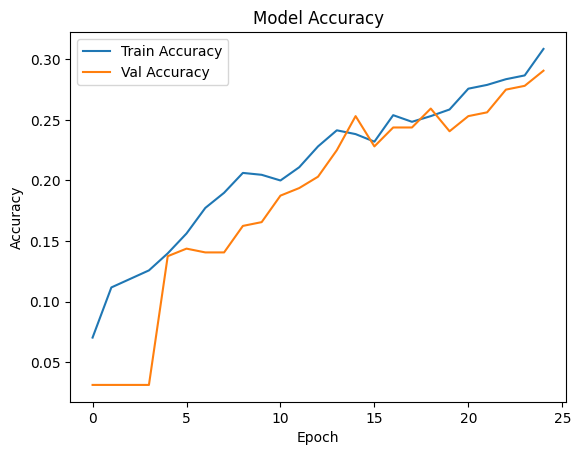

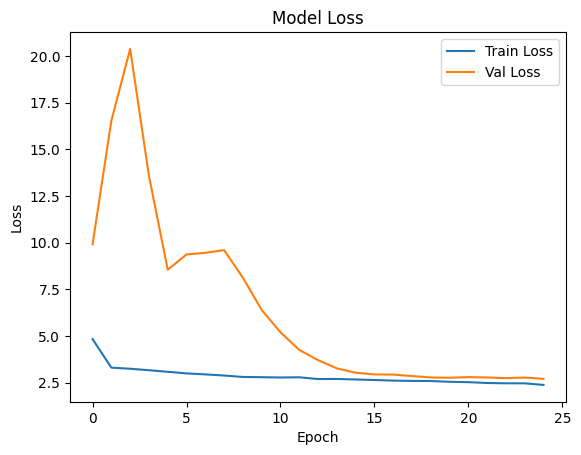

In [17]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [19]:
model.save("tree_species_model1.h5")


In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img("/content/Tree_Species_Dataset/mango/1.jpg", target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_index = np.argmax(pred)
class_labels = list(train_generator.class_indices.keys())  # get class names
print(f"Predicted species: {class_labels[predicted_index]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted species: coconut


In [23]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

jamun_dir = '/content/Tree_Species_Dataset/jamun'
image_files = os.listdir(jamun_dir)

for img_file in image_files:
    img_path = os.path.join(jamun_dir, img_file)
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    predicted_index = np.argmax(pred)
    class_labels = list(train_generator.class_indices.keys())
    print(f"Image: {img_file}, Predicted species: {class_labels[predicted_index]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Image: images (17).jpg, Predicted species: simlo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Image: images (15).jpeg, Predicted species: coconut
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Image: images (7).jpg, Predicted species: banyan
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Image: sample.jpeg, Predicted species: jamun
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image: images (13).jpeg, Predicted species: bamboo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Image: images (10).jpg, Predicted species: coconut
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Image: download.jpeg, Predicted species: bamboo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Image: images (14).jpeg, Predicted species: simlo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Image: images (5).jpg, Predicted species: simlo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: images (2).jpg, Predicted species: kanchan
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: images (11).jpeg, Predicted species: champa
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
